### Student Information
Name:黃曼琳

Student ID:108065507

GitHub ID:elainehml

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

In [2]:
import os
basePath = os.path.dirname(os.path.abspath("anger-ratings-0to1.train.txt"))
print(basePath)

import pandas as pd

### training data
anger_train = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

/Users/huangmanlin/Github/DMlab2/DM19-Lab2-Homework


In [3]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(basePath+"/dm19-lab2-nthu/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [7]:
train_df['text']= train_df['text'].str.lower()
train_df.head()

,id,text,emotion,intensity
3121,40294,the new lock sound is grim,sadness,0.562
2435,30431,a cheerful heart is an unending banquet.- prov...,joy,0.480
159,10159,"@mdivincenzo9 he's stupid, i hate him lol #bitter",anger,0.646
188,10188,@susanhensthe shameful display i watched today...,anger,0.625
2803,30799,@laurenbrierley2 sparkling water = death,joy,0.125


In [8]:
test_df['text']= test_df['text'].str.lower()
test_df.head()

,id,text,emotion,intensity
277,40790,all i want to do is watch some netflix but i a...,sadness,0.667
249,30878,@airtelindia have some issues with my broadban...,joy,0.038
33,10890,all brian does is sleep and aggravate me,anger,0.833
239,30868,@bruins_514 @gorddownie @thehipdotcom it would...,joy,0.519
47,10904,#oow16 #sting decent new song,anger,0.125


In [9]:
train = train_df['text'].str.split(' ')
train.head()

3121                    [the, new, lock, sound, is, grim]
2435    [a, cheerful, heart, is, an, unending, banquet...
159     [@mdivincenzo9, he's, stupid,, i, hate, him, l...
188     [@susanhensthe, shameful, display, i, watched,...
2803       [@laurenbrierley2, sparkling, water, =, death]
Name: text, dtype: object

In [10]:
test = test_df['text'].str.split(' ')
test.head()

277    [all, i, want, to, do, is, watch, some, netfli...
249    [@airtelindia, have, some, issues, with, my, b...
33     [all, brian, does, is, sleep, and, aggravate, me]
239    [@bruins_514, @gorddownie, @thehipdotcom, it, ...
47                   [#oow16, #sting, decent, new, song]
Name: text, dtype: object

In [11]:
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#matplotlib inline

In [12]:
train_cleaned = []


for text in train:
    text = [x.strip(string.punctuation) for x in text]
    train_cleaned.append(text)

train_cleaned[0]

text_train = [" ".join(text) for text in train_cleaned]
final_text_train = " ".join(text_train)
final_text_train[:500]

"the new lock sound is grim a cheerful heart is an unending banquet.-\xa0proverbs mishle 15:16 mdivincenzo9 he's stupid i hate him lol bitter susanhensthe shameful display i watched today has left me reeling with so much anger dt i feel like exploding those clowns should watch it laurenbrierley2 sparkling water  death sadiqkhan terrorism shouldn't be a way of life in the united etates and wasn't until islam brought it here islamexposed islambacon how can america be so openly embracing racism dismaye"

In [13]:
test_cleaned = []


for text in test:
    text = [x.strip(string.punctuation) for x in text]
    test_cleaned.append(text)

test_cleaned[0]

text_test = [" ".join(text) for text in test_cleaned]
final_text_test = " ".join(text_test)
final_text_test[:500]

'all i want to do is watch some netflix but i am stuck here in class depressing airtelindia have some issues with my broadband bill i am charged for the month before i signed up with airtel  all brian does is sleep and aggravate me bruins_514 gorddownie thehipdotcom it would be tragicallyhip if they can help toysforasmile make hospitalized  sick kids smile 😊✌❤ oow16 sting decent new song gronnhair buryprofs dittobistro it was indeed lovely and the team were incredibly attentive and on the ball ch'

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [14]:
stopwords = set(STOPWORDS)

filtered_words_train = [word for word in final_text_train.split() if word not in stopwords]
#filtered_words_train = [word for word in final_text_train.split()]
counted_words_train = collections.Counter(filtered_words_train)


word_count_train = {}

for letter, count in counted_words_train.most_common(30):
    word_count_train[letter] = count
    
for i,j in word_count_train.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: amp, count: 162
Word: will, count: 160
Word: one, count: 136
Word: now, count: 131
Word: people, count: 117
Word: time, count: 114
Word: day, count: 113
Word: know, count: 112
Word: good, count: 110
Word: love, count: 109
Word: u, count: 103
Word: watch, count: 97
Word: think, count: 97
Word: still, count: 95
Word: go, count: 91
Word: make, count: 89
Word: today, count: 86
Word: happy, count: 86
Word: want, count: 83
Word: got, count: 81
Word: lost, count: 80
Word: never, count: 80
Word: see, count: 78
Word: back, count: 78
Word: really, count: 78
Word: life, count: 76
Word: feel, count: 75
Word: way, count: 74
Word: need, count: 74
Word: always, count: 74


In [15]:
results_train=[]
for word in word_count_train:
    tuple = (word, word_count_train[word])
    results_train.append(tuple)

In [16]:
results_train

[('amp', 162),
 ('will', 160),
 ('one', 136),
 ('now', 131),
 ('people', 117),
 ('time', 114),
 ('day', 113),
 ('know', 112),
 ('good', 110),
 ('love', 109),
 ('u', 103),
 ('watch', 97),
 ('think', 97),
 ('still', 95),
 ('go', 91),
 ('make', 89),
 ('today', 86),
 ('happy', 86),
 ('want', 83),
 ('got', 81),
 ('lost', 80),
 ('never', 80),
 ('see', 78),
 ('back', 78),
 ('really', 78),
 ('life', 76),
 ('feel', 75),
 ('way', 74),
 ('need', 74),
 ('always', 74)]

In [17]:
clean = pd.DataFrame(results_train,columns=['words', 'count'])

clean.head()

,words,count
0,amp,162
1,will,160
2,one,136
3,now,131
4,people,117


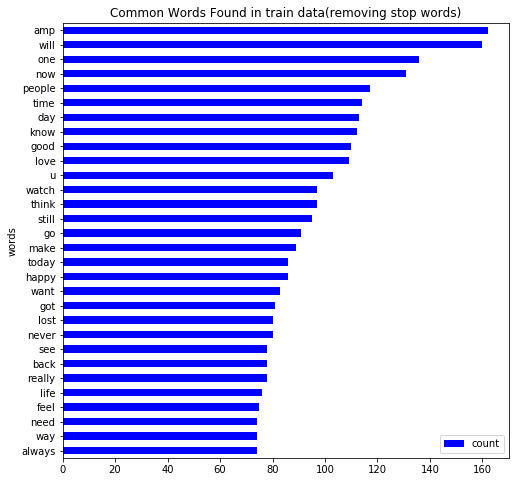

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in train data(removing stop words)")

plt.show()

In [19]:
filtered_words_test = [word for word in final_text_test.split() if word not in stopwords]
#filtered_words_test = [word for word in final_text_test.split()]
counted_words_test = collections.Counter(filtered_words_test)


word_count_test = {}

for letter, count in counted_words_test.most_common(30):
    word_count_test[letter] = count
    
for i,j in word_count_test.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: will, count: 22
Word: one, count: 17
Word: people, count: 15
Word: day, count: 14
Word: love, count: 13
Word: want, count: 12
Word: make, count: 12
Word: now, count: 11
Word: much, count: 10
Word: think, count: 10
Word: amp, count: 10
Word: awful, count: 10
Word: new, count: 9
Word: even, count: 9
Word: man, count: 9
Word: know, count: 9
Word: us, count: 9
Word: anger, count: 9
Word: life, count: 9
Word: happy, count: 8
Word: time, count: 8
Word: things, count: 8
Word: optimism, count: 7
Word: look, count: 7
Word: good, count: 7
Word: today, count: 7
Word: little, count: 7
Word: something, count: 7
Word: sad, count: 7
Word: really, count: 7


In [20]:
results_test=[]
for word in word_count_test:
    tuple = (word, word_count_test[word])
    results_test.append(tuple)

In [21]:
results_test

[('will', 22),
 ('one', 17),
 ('people', 15),
 ('day', 14),
 ('love', 13),
 ('want', 12),
 ('make', 12),
 ('now', 11),
 ('much', 10),
 ('think', 10),
 ('amp', 10),
 ('awful', 10),
 ('new', 9),
 ('even', 9),
 ('man', 9),
 ('know', 9),
 ('us', 9),
 ('anger', 9),
 ('life', 9),
 ('happy', 8),
 ('time', 8),
 ('things', 8),
 ('optimism', 7),
 ('look', 7),
 ('good', 7),
 ('today', 7),
 ('little', 7),
 ('something', 7),
 ('sad', 7),
 ('really', 7)]

In [22]:
cleant = pd.DataFrame(results_test,columns=['words', 'count'])

cleant.head()

,words,count
0,will,22
1,one,17
2,people,15
3,day,14
4,love,13


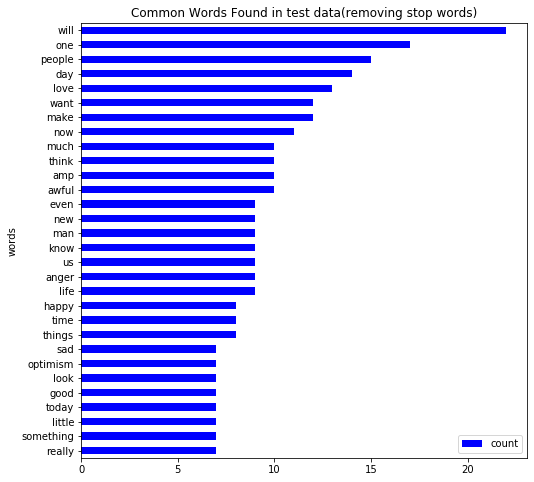

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
cleant.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in test data(removing stop words)")

plt.show()

---
### 1.2 Save data
We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [24]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [25]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 1000) 
tfidf.fit(train_df['text'])
tfidf_features = tfidf.transform(train_df['text'])

In [27]:
feature_names_1000 = tfidf.get_feature_names()
feature_names_1000[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = tfidf.transform(train_df['text'])
y_train = train_df['emotion']

X_test = tfidf.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'fear', 'joy', 'anger', 'joy', 'joy', 'anger',
       'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.75


In [31]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.70      0.82      0.76        84
        fear       0.73      0.75      0.74       110
         joy       0.84      0.81      0.83        79
     sadness       0.75      0.61      0.67        74

    accuracy                           0.75       347
   macro avg       0.76      0.75      0.75       347
weighted avg       0.75      0.75      0.75       347



In [32]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[69 10  2  3]
 [13 83  6  8]
 [ 5  6 64  4]
 [11 14  4 45]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

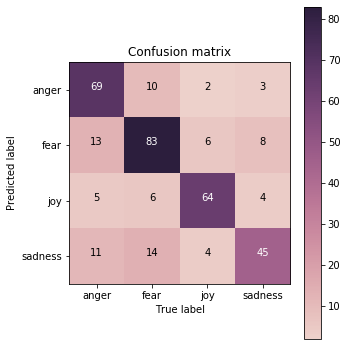

In [34]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

Some of classes are easyily to be confused so that they have higher score in the graph above. Like fear and anger, fear and sadnedd.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
from sklearn.naive_bayes import MultinomialNB
trained_clf = MultinomialNB().fit(X_train, y_train)

In [36]:
y_trainclf_pred = trained_clf.predict(X_train)
y_testclf_pred = trained_clf.predict(X_test)

y_testclf_pred[:10]

array(['sadness', 'anger', 'fear', 'fear', 'anger', 'joy', 'joy', 'anger',
       'joy', 'joy'], dtype='<U7')

In [37]:
## accuracy
from sklearn.metrics import accuracy_score

acc_trainclf = accuracy_score(y_true=y_train, y_pred=y_trainclf_pred)
acc_testclf = accuracy_score(y_true=y_test, y_pred=y_testclf_pred)

print('training accuracy: {}'.format(round(acc_trainclf, 2)))
print('testing accuracy: {}'.format(round(acc_testclf, 2)))

training accuracy: 0.87
testing accuracy: 0.77


In [38]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_testclf_pred))

              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_testclf_pred) 
print(cm)

[[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

可以參考上課講義關於兩者理論上的不同

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [40]:
training_log = pd.read_csv(basePath+"/dm19-lab2-nthu/logs/training_log.csv")

In [43]:
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.381954,1.326823,0.429395,1.280761
1,1,0.635206,0.978438,0.685879,0.887704
2,2,0.797398,0.566829,0.708934,0.758821
3,3,0.852477,0.397790,0.714697,0.784289
4,4,0.888458,0.308585,0.685879,0.829405
5,5,0.914475,0.246630,0.700288,0.863588
6,6,0.935787,0.203988,0.714697,0.937775
7,7,0.946859,0.169463,0.674352,0.991099
8,8,0.953225,0.143732,0.700288,1.004707
9,9,0.960421,0.129482,0.694524,1.086991


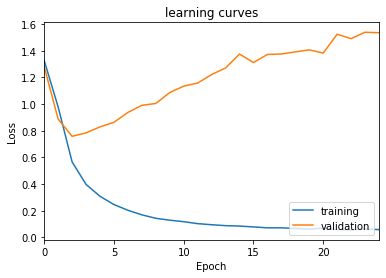

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

lines = training_log.plot.line(x='epoch', y=['loss', 'val_loss'])
plt.title('learning curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

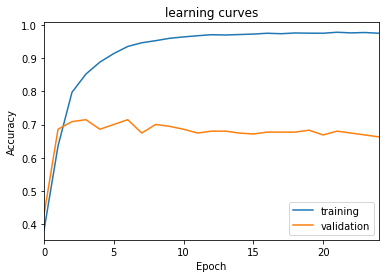

In [46]:
lines = training_log.plot.line(x='epoch', y=['accuracy', 'val_accuracy'])
plt.title('learning curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?



---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [48]:
from gensim.models import KeyedVectors

model_path = basePath+"/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [51]:
keys = ["angry", "happy", "sad", "fear"]

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_google_model.most_similar(word, topn=15):
        words.append(similar_word)
        embeddings.append(w2v_google_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [53]:
word_clusters

[['irate',
  'enraged',
  'indignant',
  'incensed',
  'annoyed',
  'agitated',
  'frustrated',
  'furious',
  'unhappy',
  'outraged',
  'livid',
  'irritated',
  'exasperated',
  'angrier',
  'Angry'],
 ['glad',
  'pleased',
  'ecstatic',
  'overjoyed',
  'thrilled',
  'satisfied',
  'proud',
  'delighted',
  'disappointed',
  'excited',
  'happier',
  'Said_Hirschbeck',
  'elated',
  'thankful',
  'unhappy'],
 ['saddening',
  'Sad',
  'saddened',
  'heartbreaking',
  'disheartening',
  'Meny_Friedman',
  'parishioner_Pat_Patello',
  'saddens_me',
  'distressing',
  'reminders_bobbing',
  'Turkoman_Shiites',
  'saddest',
  'unfortunate',
  'sorry',
  'bittersweet'],
 ['fearful',
  'fears',
  'Fear',
  'fearing',
  'worry',
  'dread',
  'feared',
  'anxiety',
  'apprehension',
  'afraid',
  'worries',
  'concern',
  'distrust',
  'worried',
  'Fearful']]

In [59]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

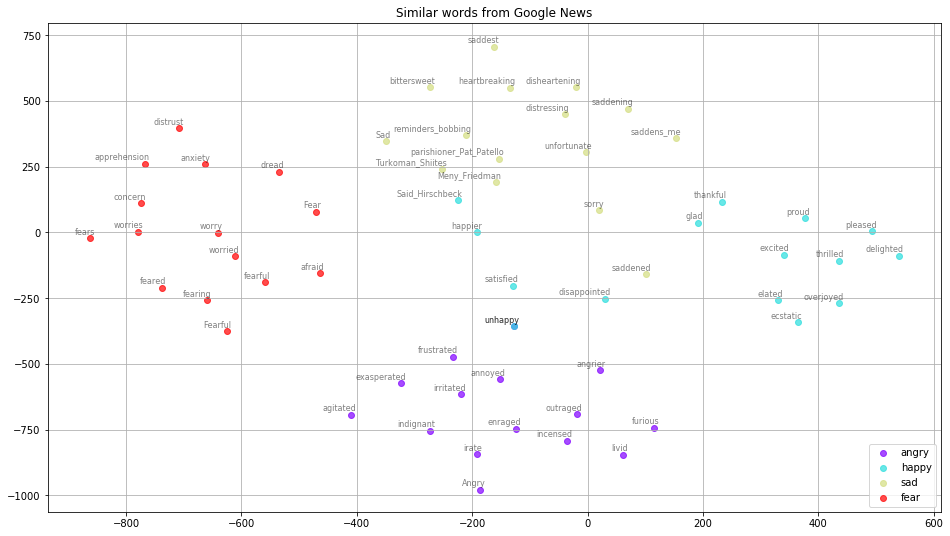

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')